<a href="https://colab.research.google.com/github/anish15032005/Data-Science/blob/main/practice_1406.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
# Dataset with issues
import pandas as pd
import matplotlib.pyplot as plt


data = {
    'Name': ['Anish ', 'pranjul', 'DIVYANSHU', 'Kanwal', 'Komal', 'Komal', 'Shreyansh', None],
    'Age': ['20', '21', None, 'twenty', '23', '23', '22', '21'],
    'Gender': ['M', 'm', 'Male', 'FEMALE', 'f', 'F', None, 'M'],
    'Score': [85, None, 90, 88, 100, 100, 65, 110]
}

df = pd.DataFrame(data)
df


,Name,Age,Gender,Score
0,Anish,20,M,85.0
1,pranjul,21,m,NaN
2,DIVYANSHU,None,Male,90.0
3,Kanwal,twenty,FEMALE,88.0
4,Komal,23,f,100.0
5,Komal,23,F,100.0
6,Shreyansh,22,None,65.0
7,None,21,M,110.0


In [2]:
#Let's Inspect the data
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    7 non-null      object 
 1   Age     7 non-null      object 
 2   Gender  7 non-null      object 
 3   Score   7 non-null      float64
dtypes: float64(1), object(3)
memory usage: 388.0+ bytes
None
Name      1
Age       1
Gender    1
Score     1
dtype: int64


Cleaning the Data Step by Step

In [3]:
#Strip Name, Capitalize Consistently
df['Name'] = df['Name'].str.strip().str.capitalize()

In [4]:
#Handle Missing Names
df = df.dropna(subset = ['Name'])  # or df['Name'].fillna("Unknown")

In [5]:
#Fixing age column
#Convert all to numeric, coerce errors like 'twenty' into NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

<ipython-input-5-3889941907>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = pd.to_numeric(df['Age'], errors='coerce')


In [6]:
#fill missing ages with median
df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-6-2960032794>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-6-2960032794>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'].fillna(df['Age'].median(), inplace=True)


In [7]:
#Fix Gender Column
df['Gender'] = df['Gender'].str.upper().str[0]  # Converts to M or F
df['Gender'].fillna('U', inplace=True)  # U = Unknown


<ipython-input-7-2700788313>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].str.upper().str[0]  # Converts to M or F
<ipython-input-7-2700788313>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna('U', inplace=True)  # U = Unknown
<ipython-

In [8]:
#Fix duplicate names
df = df.drop_duplicates(subset=['Name'])



In [9]:
#Correct score
df['Score'] = df['Score'].apply(lambda x: min(x, 100))

#fill missing score with average
df['Score'].fillna(df['Score'].mean(), inplace=True)

#print cleaned data
df

<ipython-input-9-2305492170>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Score'].fillna(df['Score'].mean(), inplace=True)


,Name,Age,Gender,Score
0,Anish,20.0,M,85.0
1,Pranjul,21.0,M,85.6
2,Divyanshu,22.0,M,90.0
3,Kanwal,22.0,F,88.0
4,Komal,23.0,F,100.0
6,Shreyansh,22.0,U,65.0


In [14]:
import pandas as pd

data = {
    'Name': ['Koley', 'RoyChoudhary', 'Chatterjee'],
    'Age': [20, 21, 22],
    'Score': [88, 92, 85]
}

df = pd.DataFrame(data, index=['a', 'b', 'c'])  # custom row labels
print(df)


           Name  Age  Score
a         Koley   20     88
b  RoyChoudhary   21     92
c    Chatterjee   22     85


In [15]:
#first reow by position or say column
df.iloc[0]

,a
Name,Koley
Age,20
Score,88


In [16]:
#first row by label
df.loc['a']

,a
Name,Koley
Age,20
Score,88


In [17]:
#Targeting a specific value
df.loc['a' , 'Name']

'Koley'

In [21]:
#Slicing
df.loc['a':'c', ["Name","Age"]]

,Name,Age
a,Koley,20
b,RoyChoudhary,21
c,Chatterjee,22


In [24]:
#For acessing a single element, we can use .at and .iat for fast acess
print(df.at['a','Name'])

print(df.iat[0,1])

Koley
20


In [26]:
#Adding a new feature
df['Gender'] = ['M', 'M', 'F']
df

,Name,Age,Score,Gender
a,Koley,20,88,M
b,RoyChoudhary,21,92,M
c,Chatterjee,22,85,F


In [30]:
#Don't get afraid by the term dynamic column names, it is something like this
# col = "Age"
# df[col == 22]
# df


df2 = {
    'Name':["Jasmine","Haris","Chinki","Ashwini"],
    'City':['Manila',"Rampur","Ranchi","Mumbai"],
    'Year':[2017,2023,2018,2016],
    'Occupation':['Sales Consultant','Programmer','Bank Manager','Call Agency']
}

df2 = pd.DataFrame(df2)
df2

,Name,City,Year,Occupation
0,Jasmine,Manila,2017,Sales Consultant
1,Haris,Rampur,2023,Programmer
2,Chinki,Ranchi,2018,Bank Manager
3,Ashwini,Mumbai,2016,Call Agency


In [34]:
#Use of Query
result = df2.query('Year < 2018 and City == "Manila"')
#keep in mind that query returns a copy, not a view
print(result)

      Name    City  Year        Occupation
0  Jasmine  Manila  2017  Sales Consultant


In [42]:
df_weird = {
    "Name":["Rohan","Somya","Soham","Ayan", "Atanu"],
    "Gender":['M','F','M',None,'M'],
    "Age":[20,20,20,21,1000]
}
df_weird = pd.DataFrame(df_weird)
# df_weird
#Check for missing values
df_weird.isnull()

#Counting missing per column
df_weird.isnull().sum()

,0
Name,0
Gender,1
Age,0


In [43]:
#Drop Missing Data
df_weird.dropna()
df_weird

,Name,Gender,Age
0,Rohan,M,20
1,Somya,F,20
2,Soham,M,20
3,Ayan,None,21
4,Atanu,M,1000


In [44]:
#drop columns with missing values
df_weird.dropna(axis=1)

,Name,Age
0,Rohan,20
1,Somya,20
2,Soham,20
3,Ayan,21
4,Atanu,1000


In [83]:
people = {
    "Name":["Om","Ajay","Avinash","Saurav","Mohan","Mohan","Sneha"],
    "Age":[20,16,20,24,21,21,20],
    "Location":["Kota","Forbesganj","Mumbai","Amritsar","Motihari","Motihari","Kolkata"],
    "Gender":["M","M","M","M","M","M","F"]
}

people = pd.DataFrame(people)
people

,Name,Age,Location,Gender
0,Om,20,Kota,M
1,Ajay,16,Forbesganj,M
2,Avinash,20,Mumbai,M
3,Saurav,24,Amritsar,M
4,Mohan,21,Motihari,M
5,Mohan,21,Motihari,M
6,Sneha,20,Kolkata,F


In [84]:
#Replace NaN with zero
# people['Age'].fillna(0)

#Detecting Duplicates
# people.duplicated()

#for specific column
people.duplicated(subset=['Name'])

,0
0,False
1,False
2,False
3,False
4,False
5,True
6,False


In [85]:
#Removing Duplicate rows
people = people.drop_duplicates()#it will return a copied dataframe, not the original one

#if you want to change the original dataframe
people.drop_duplicates(inplace=True)
people

<ipython-input-85-3936421963>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  people.drop_duplicates(inplace=True)


,Name,Age,Location,Gender
0,Om,20,Kota,M
1,Ajay,16,Forbesganj,M
2,Avinash,20,Mumbai,M
3,Saurav,24,Amritsar,M
4,Mohan,21,Motihari,M
6,Sneha,20,Kolkata,F


In [86]:
location = people["Location"].str.split("@")#Outputs a pandas series where each element is a list
print(location)

0          [Kota]
1    [Forbesganj]
2        [Mumbai]
3      [Amritsar]
4      [Motihari]
6       [Kolkata]
Name: Location, dtype: object


In [87]:
 #Checking the datatypes of columns
 people.dtypes

,0
Name,object
Age,int64
Location,object
Gender,object


In [88]:
#Apply any function to row or column
people['Age Group'] = people['Age'].apply(lambda x: 'Adult' if x >= 18 else 'Child')
people

<ipython-input-88-1151565759>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  people['Age Group'] = people['Age'].apply(lambda x: 'Adult' if x >= 18 else 'Child')


,Name,Age,Location,Gender,Age Group
0,Om,20,Kota,M,Adult
1,Ajay,16,Forbesganj,M,Child
2,Avinash,20,Mumbai,M,Adult
3,Saurav,24,Amritsar,M,Adult
4,Mohan,21,Motihari,M,Adult
6,Sneha,20,Kolkata,F,Adult


In [89]:
#Element wise mapping for series
gender_mapping = {'M':'Male', 'F':'Female'}
people['Gender'] = people['Gender'].map(gender_mapping)
name = people['Name']
age = people['Age']
people

<ipython-input-89-2721543182>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  people['Gender'] = people['Gender'].map(gender_mapping)


,Name,Age,Location,Gender,Age Group
0,Om,20,Kota,Male,Adult
1,Ajay,16,Forbesganj,Male,Child
2,Avinash,20,Mumbai,Male,Adult
3,Saurav,24,Amritsar,Male,Adult
4,Mohan,21,Motihari,Male,Adult
6,Sneha,20,Kolkata,Female,Adult


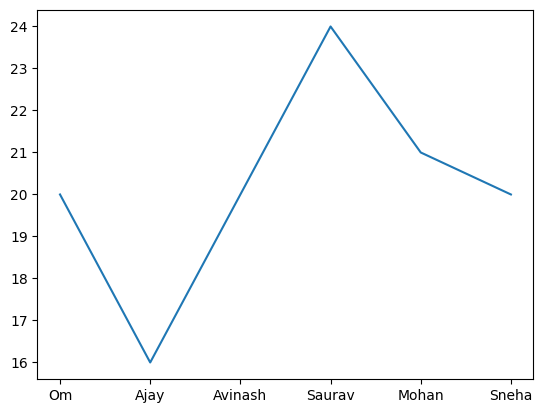

In [92]:
plt.plot(name,age)

In [93]:
#Replacing a value
people['Name'].replace({"Saurav":"Sanjay"})

,Name
0,Om
1,Ajay
2,Avinash
3,Sanjay
4,Mohan
6,Sneha


In [94]:
#sorting data
people.sort_values("Age")#it will by-default sort in ascending order

,Name,Age,Location,Gender,Age Group
1,Ajay,16,Forbesganj,Male,Child
0,Om,20,Kota,Male,Adult
2,Avinash,20,Mumbai,Male,Adult
6,Sneha,20,Kolkata,Female,Adult
4,Mohan,21,Motihari,Male,Adult
3,Saurav,24,Amritsar,Male,Adult


In [96]:
#But if you want to reset index
people.reset_index(drop = True, inplace = True)
people

,Name,Age,Location,Gender,Age Group
0,Om,20,Kota,Male,Adult
1,Ajay,16,Forbesganj,Male,Child
2,Avinash,20,Mumbai,Male,Adult
3,Saurav,24,Amritsar,Male,Adult
4,Mohan,21,Motihari,Male,Adult
5,Sneha,20,Kolkata,Female,Adult


In [97]:
#Ranaming a column
people.rename(columns = {'Location':'Current City'}, inplace = True)
people

<ipython-input-97-4170858767>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  people.rename(columns = {'Location':'Current City'}, inplace = True)


,Name,Age,Current City,Gender,Age Group
0,Om,20,Kota,Male,Adult
1,Ajay,16,Forbesganj,Male,Child
2,Avinash,20,Mumbai,Male,Adult
3,Saurav,24,Amritsar,Male,Adult
4,Mohan,21,Motihari,Male,Adult
5,Sneha,20,Kolkata,Female,Adult
